In [1]:
import copy
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 현황

### 지역별 매출

In [23]:
df = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
df['총배송기간'] = df['출고기간'] + df['배송기간']
df['물품대분류'] = df['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)
df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,거주지역,출고기간,배송기간,구매요일,총배송기간
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,인천,1,4,0,5
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,기저귀,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,인천,1,2,3,3
2,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,부산,1,2,0,3
3,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,경남,1,2,4,3
4,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,경남,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166352,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,충남,1,2,6,3
166353,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,기저귀,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,충남,1,2,4,3
166354,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,충북,1,2,4,3
166355,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,서울,1,3,6,4


/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_36762/2540738429.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


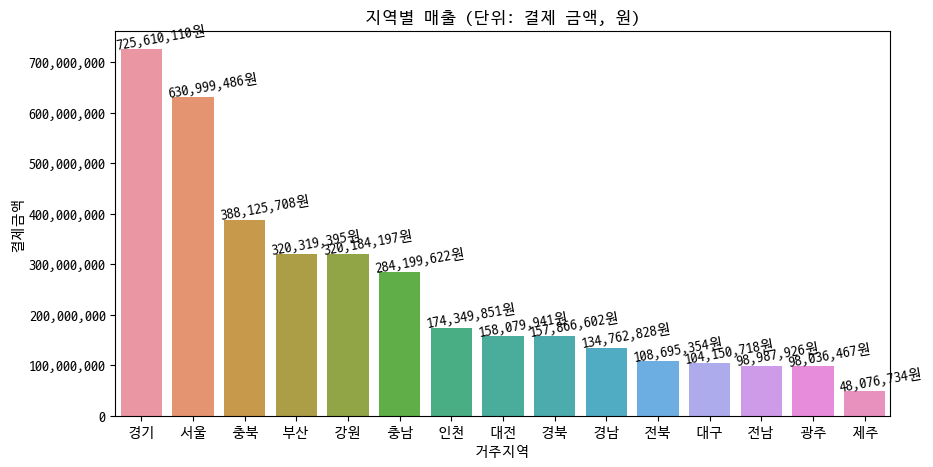

In [24]:
df_grouped = df.groupby('거주지역', as_index=False)['결제금액'].sum()
df_grouped_sorted = df_grouped.sort_values(by='결제금액', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='거주지역', y='결제금액', data=df_grouped_sorted)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

for xtick in plt.gca().get_xticks():
    plt.text(xtick - 0.5, df_grouped_sorted['결제금액'][xtick], f"{df_grouped_sorted['결제금액'][xtick]:,}원", rotation=10)

plt.title('지역별 매출 (단위: 결제 금액, 원)')
plt.show()

#### ~~지역별 수량 안씀~~

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_36762/316907869.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


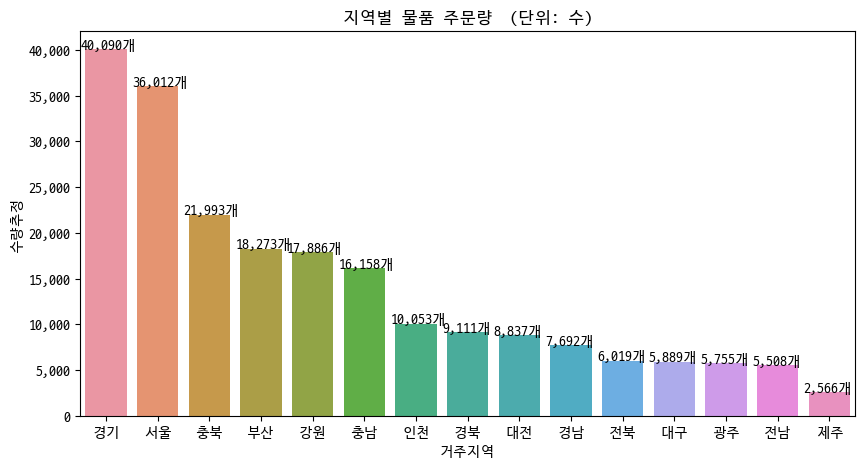

In [25]:
df_grouped = df.groupby('거주지역', as_index=False)['수량추정'].sum()
df_grouped_sorted = df_grouped.sort_values(by='수량추정', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='거주지역', y='수량추정', data=df_grouped_sorted)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

for xtick in plt.gca().get_xticks():
    plt.text(xtick - 0.5, df_grouped_sorted['수량추정'][xtick], f"{df_grouped_sorted['수량추정'][xtick]:,.0f}개")

plt.title('지역별 물품 주문량  (단위: 수)')
plt.show()

### 구매물품 Top5

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_36762/831946185.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


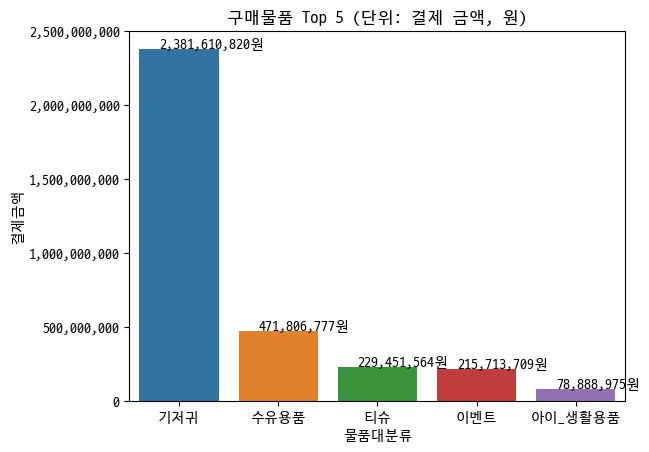

In [33]:
df_grouped = df.groupby('물품대분류', as_index=False)['결제금액'].sum()
df_grouped_sorted = df_grouped.sort_values(by='결제금액', ascending=False).reset_index(drop=True)[:5]

sns.barplot(x='물품대분류', y='결제금액', data=df_grouped_sorted)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

for xtick in plt.gca().get_xticks():
    plt.text(xtick-0.2, df_grouped_sorted['결제금액'][xtick], f"{df_grouped_sorted['결제금액'][xtick]:,}원")

plt.title('구매물품 Top 5 (단위: 결제 금액, 원)')
plt.show()

#### ~~구매물품 Top 3 (단위: 수량) 안씀~~

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_36762/1447521523.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


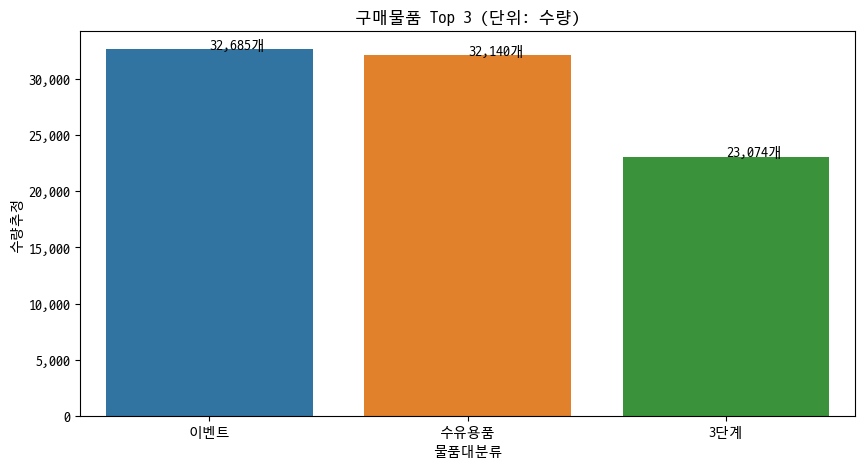

In [11]:
df_grouped = df.groupby('물품대분류', as_index=False)['수량추정'].sum()
df_grouped_sorted = df_grouped.sort_values(by='수량추정', ascending=False).reset_index(drop=True)[:3]

plt.figure(figsize=(10, 5))
sns.barplot(x='물품대분류', y='수량추정', data=df_grouped_sorted)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

for xtick in plt.gca().get_xticks():
    plt.text(xtick, df_grouped_sorted['수량추정'][xtick], f"{df_grouped_sorted['수량추정'][xtick]:,.0f}개")

plt.title('구매물품 Top 3 (단위: 수량)')
plt.show()

## 배송

/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_34261/1611526031.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


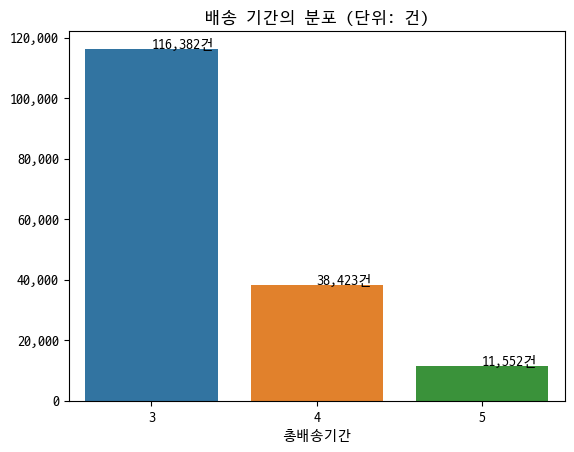

In [159]:
df_grouped = df.groupby('총배송기간').count().iloc[:, 0]

sns.barplot(x=df_grouped.index, y=df_grouped.values)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

for xtick in plt.gca().get_xticks():
    plt.text(xtick, df_grouped.iloc[xtick], f"{df_grouped.iloc[xtick]:,}건")

plt.title('배송 기간의 분포 (단위: 건)')
plt.show()

### 배송 불만족 고객이 구매한 물품 점유율 Top 3

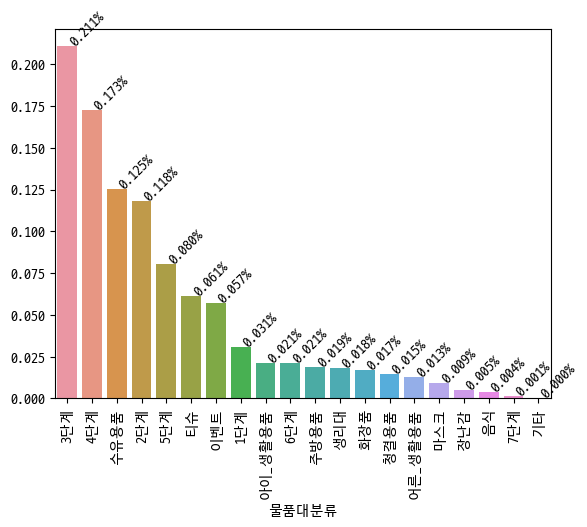

In [213]:
baesong = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
baesong['총배송기간'] = baesong['출고기간'] + baesong['배송기간']
baesong = baesong[(baesong['총배송기간'] == 4) | (baesong['총배송기간'] == 5)]
baesong = baesong.groupby('물품대분류')['결제금액'].sum().sort_values(ascending=False)
baesong = baesong / sum(baesong)
baesong = baesong

sns.barplot(x=baesong.index, y=baesong.values)
for xtick in plt.gca().get_xticks():
    plt.text(xtick, baesong.values[xtick], f"{baesong.values[xtick]:.3f}%", rotation=45)
plt.xticks(rotation=90)
plt.show()

### divider

In [221]:
sales_df = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
sales_df['총배송기간'] = sales_df['출고기간'] + sales_df['배송기간']
sales_df['물품대분류'] = sales_df['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)

member_df = pd.read_csv('../data/Member_data4.csv', encoding='euc-kr').drop_duplicates()

# member_df = pd.merge(df, member_df[['고객번호', '성별']], on='고객번호', how='left')
# sex_df = member_df['성별'].value_counts()

sales_df
# member_df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,거주지역,출고기간,배송기간,구매요일,총배송기간
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,인천,1,4,0,5
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,기저귀,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,인천,1,2,3,3
2,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,부산,1,2,0,3
3,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,경남,1,2,4,3
4,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,경남,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166352,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,충남,1,2,6,3
166353,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,기저귀,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,충남,1,2,4,3
166354,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,충북,1,2,4,3
166355,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,서울,1,3,6,4


In [180]:
# baesong = pd.read_csv("../data/merged_delivery.csv", encoding="euc-kr")
# baesong['총배송기간'] = baesong['출고기간'] + baesong['배송기간']
baesong = baesong[
    ((baesong["거주지역"] == "충북")
    | (baesong["거주지역"] == "충남")
    | (baesong["거주지역"] == "경기")
    | (baesong["거주지역"] == "서울"))
    & ((baesong["총배송기간"] == 4)
    | (baesong["총배송기간"] == 5))
]

baesong[['거주지역', '결제금액', '물품대분류', '상품명', '총배송기간', '제품단가']].sort_values(by='제품단가', ascending=False).to_csv('asd.csv', encoding='euc-kr', index=False)
# .sum().sort_values(by='결제금액', ascending=False)
# baesong.pivot_table(index='거주지역', columns='결제금액')





# baesong.groupby(['거주지역', '총배송기간'], as_index=False)['결제금액'].sum()
# .to_csv('asd.csv', encoding='euc-kr', index=False)
# baesong = baesong[
#     (baesong["물품대분류"] == "기타")
#     | (baesong["물품대분류"] == "7단계")
#     | (baesong["물품대분류"] == "음식")
#     | (baesong["물품대분류"] == "장난감")
#     | (baesong["물품대분류"] == "마스크")
#     | (baesong["물품대분류"] == "마스크")
#     | (baesong["물품대분류"] == "마스크")
#     | (baesong["물품대분류"] == "마스크")
#     | (baesong["물품대분류"] == "마스크")
# ]

# baesong.groupby('물품대분류')['총배송기간'].mean()

## 성별

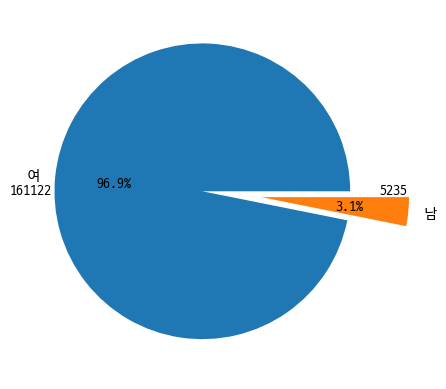

In [68]:
member_df = pd.read_csv('../data/Member_data4.csv', encoding='euc-kr')

member_df = pd.merge(df, member_df[['고객번호', '성별']].drop_duplicates(), on='고객번호', how='left')
sex_df = member_df['성별'].value_counts()

plt.pie(sex_df, labels=sex_df.index, autopct='%.1f%%', explode=[0.2, 0.2])
plt.text(-1.5, 0, sex_df[0])
plt.text(1, 0, sex_df[1])

plt.show()

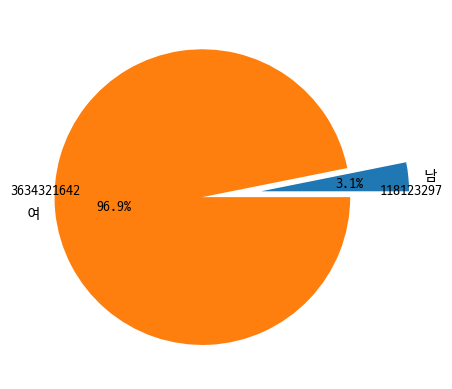

In [77]:
sex_df = member_df.groupby('성별')['결제금액'].sum()

plt.pie(sex_df.values, labels=sex_df.index, autopct='%.1f%%', explode=[0.2, 0.2])
plt.text(-1.5, 0, sex_df[1])
plt.text(1, 0, sex_df[0])

plt.show()

# Deprecated
## 지역별 물품 수요량

In [2]:
df = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
df['총배송기간'] = df['출고기간'] + df['배송기간']
df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,거주지역,출고기간,배송기간,구매요일,총배송기간
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,인천,1,4,0,5
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,인천,1,2,3,3
2,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,부산,1,2,0,3
3,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,경남,1,2,4,3
4,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,3단계,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,경남,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166352,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,충남,1,2,6,3
166353,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,충남,1,2,4,3
166354,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,충북,1,2,4,3
166355,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,서울,1,3,6,4


### 일별 기저귀 주문량

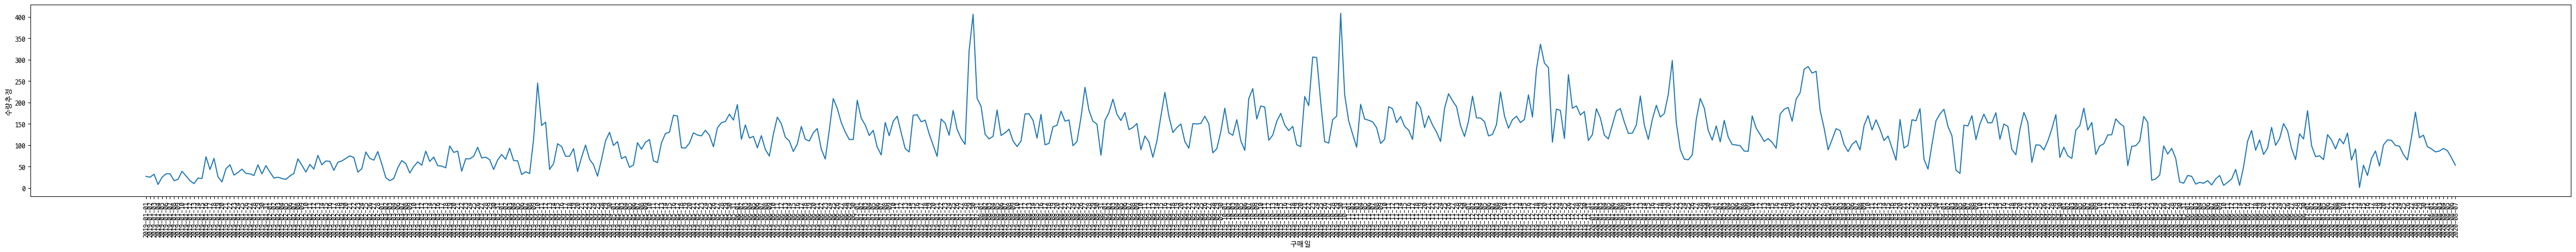

In [11]:
diaper = df[(df['물품대분류'] == '1단계') | (df['물품대분류'] == '2단계') | (df['물품대분류'] == '3단계') | (df['물품대분류'] == '4단계') | (df['물품대분류'] == '5단계') | (df['물품대분류'] == '6단계') | (df['물품대분류'] == '7단계')]
grouped_diaper = diaper.groupby('구매일', as_index=False)['수량추정'].sum()

plt.figure(figsize=(50, 5))
sns.lineplot(data=grouped_diaper, x='구매일', y='수량추정')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 주별 기저귀 주문량

/tmp/ipykernel_22088/1767850041.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


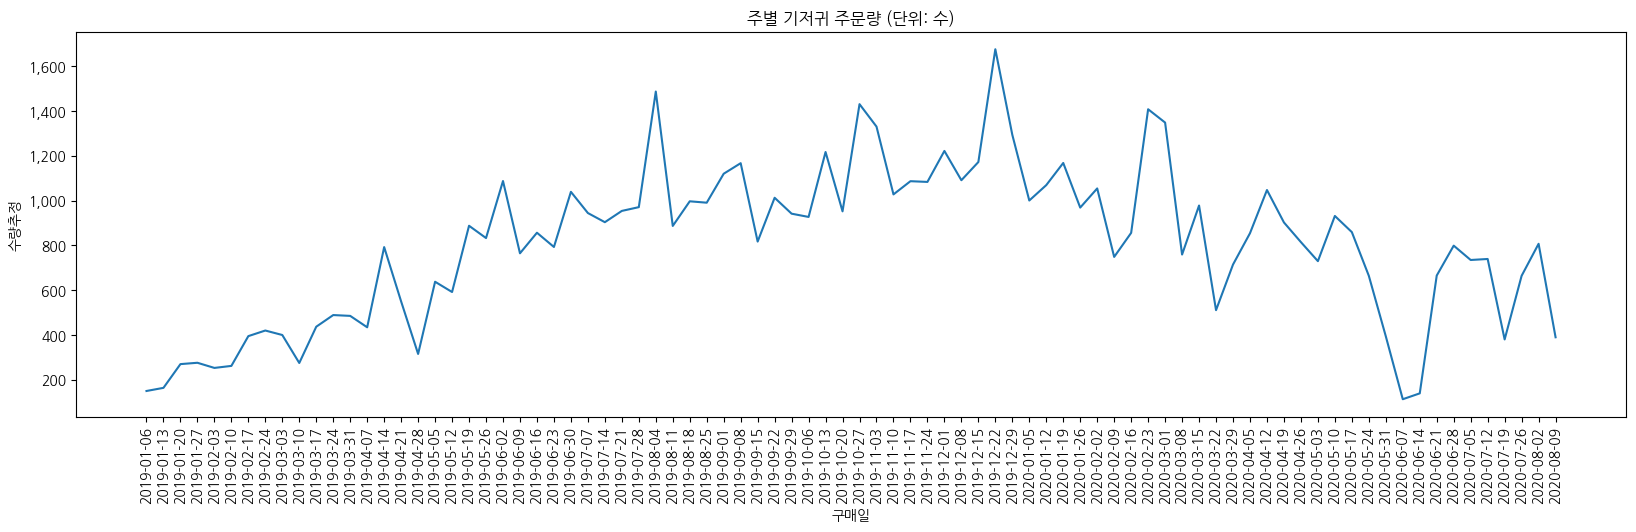

In [150]:
diaper = df[(df['물품대분류'] == '1단계') | (df['물품대분류'] == '2단계') | (df['물품대분류'] == '3단계') | (df['물품대분류'] == '4단계') | (df['물품대분류'] == '5단계') | (df['물품대분류'] == '6단계') | (df['물품대분류'] == '7단계')]
grouped_diaper = diaper.groupby('구매일', as_index=False)['수량추정'].sum()
grouped_diaper['구매일'] = pd.to_datetime(grouped_diaper['구매일'])
grouped_diaper = grouped_diaper.resample('W', on='구매일').sum()

grouped_diaper = grouped_diaper.reset_index()
grouped_diaper['구매일'] = grouped_diaper['구매일'].astype(str)

plt.figure(figsize=(20, 5))
sns.lineplot(data=grouped_diaper, x='구매일', y='수량추정')
plt.xticks(rotation=90)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('주별 기저귀 주문량 (단위: 수)')
plt.show()

### 각 지역의 물품대분류 별 주문량

/tmp/ipykernel_22088/2702091918.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


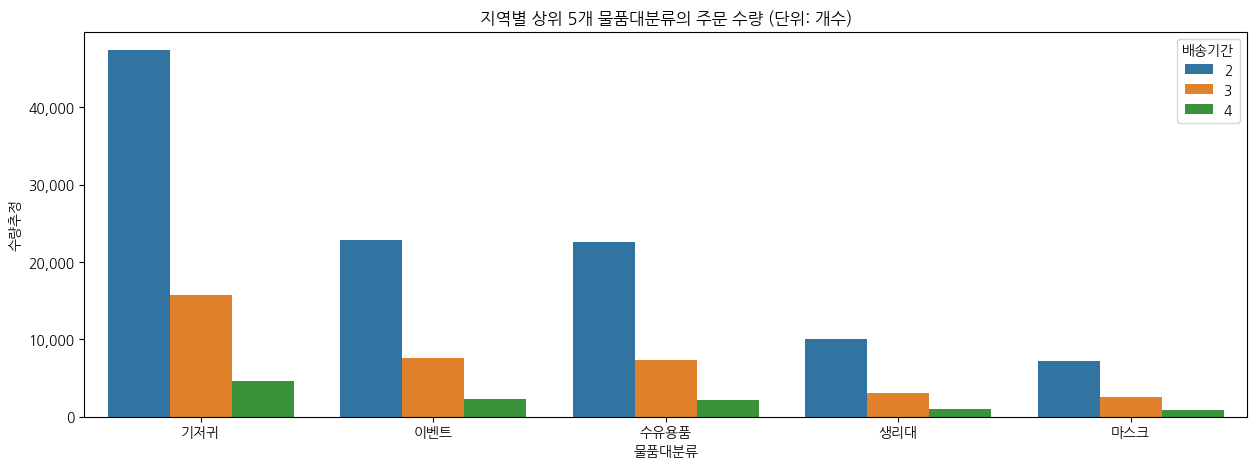

In [ ]:
df_grouped = copy.deepcopy(df)
df_grouped['물품대분류'] = df['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)
df_grouped = df_grouped.groupby(['배송기간', '물품대분류'], as_index=False).sum()

df_grouped = df_grouped[(df_grouped['물품대분류'] == '기저귀') | (df_grouped['물품대분류'] == '이벤트') | (df_grouped['물품대분류'] == '수유용품') | (df_grouped['물품대분류'] == '생리대') | (df_grouped['물품대분류'] == '마스크')]
df_grouped = df_grouped[['배송기간', '물품대분류', '수량추정']].sort_values(by=['배송기간', '수량추정'], ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='물품대분류', y='수량추정', hue='배송기간')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('지역별 상위 5개 물품대분류의 주문 수량 (단위: 개수)')
plt.show()